<a href="https://colab.research.google.com/github/mevangelista-alvarado/machine_learning/blob/main/Bosque_Aleatorio_en_IrisDataset_con_Sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

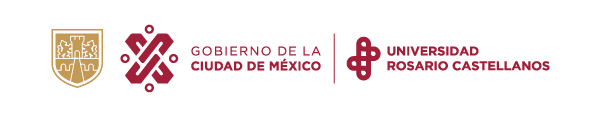

**Actualizado:** Octubre de 2023

**Autor:** Miguel Evangelista ([@mevagelista-alvarado](https://github.com/mevangelista-alvarado))

## Introducción

En este Google Colab mostramos una implementación de un bosque aleatorio con el _dataset de la flor de Iris_ precargado en el módulo de Python `sklearn`.   

## Iris Data Set

El conjunto de datos de la flor de Iris es un conjunto de datos multivariado utilizado por el estadístico y biólogo británico Ronald Fisher en su artículo "El uso de mediciones múltiples en problemas taxonómicos como ejemplo de análisis discriminante lineal" de 1936



El conjunto de datos consta de 50 muestras de cada una de las tres especies de Iris: Iris setosa, Iris virginica e Iris versicolor. De cada muestra se midieron (en centímetros) cuatro características : el largo y el ancho de los sépalos y pétalos.


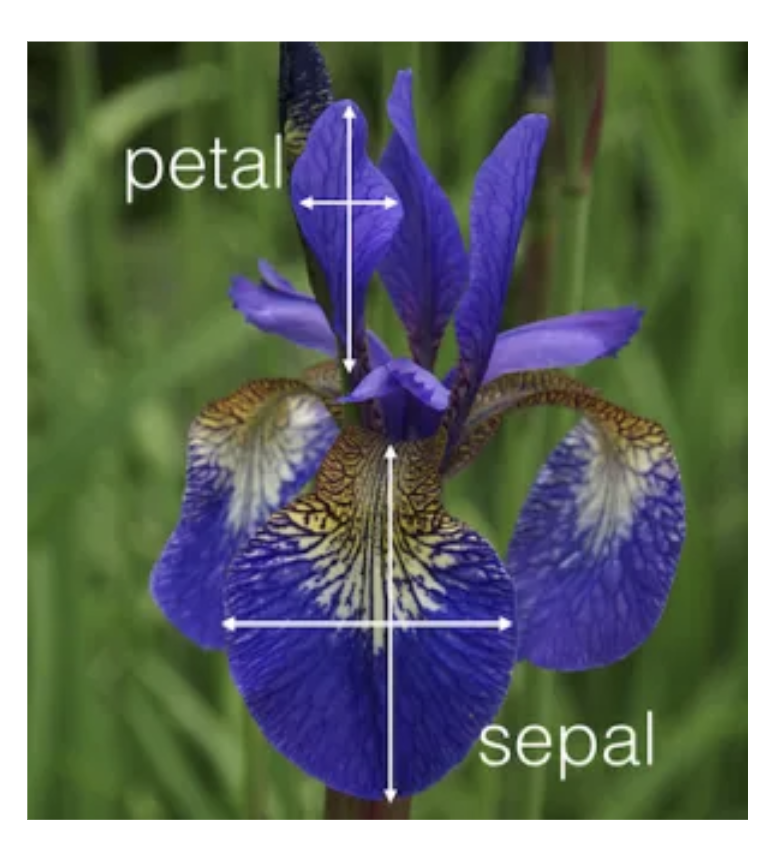

In [ ]:
from sklearn.datasets import load_iris

Guardamos el dataset de la plata del iris en en la variable `iris`

In [ ]:
iris = load_iris()

Notamos que la variable iris es un diccionario de Python. Por tal, motivo verificamos las llaves que contiene.

In [ ]:
print(iris.keys())

Notamos la llave _DESCR_, esta llave es importante por que debe contener información del dataset de la flor de Iris.

In [ ]:
print(iris.DESCR)

Exploramos más valores de algunas llaves.

In [ ]:
iris.target_names

In [ ]:
iris.target

In [ ]:
iris.data

In [ ]:
iris.feature_names

## Creando un DataFrame

Importamos el módulo `pandas` y creamos un Data Frame.

In [ ]:
import pandas as pd

iris_df = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])

Exploramos el Data Frame

In [ ]:
iris_df

Agregamos una nueva columna llamada _species_ al Data Frame

In [ ]:
iris_df['species'] = iris["target"]
iris_df

Obtenemos un pequeña descripción estadística del Data Frame

In [ ]:
iris_df.describe()

  Con ayuda del módulo `seaborn` ontenemos una pequeña descripción gráfica del Data Frame.

Este método de forma predeterminada creará una cuadrícula de ejes con las variables numéricas del Data Frame.

Los gráficos diagonales se tratan de manera diferente: se dibuja un gráfico de distribución.

In [ ]:
import seaborn as sns
sns.pairplot(iris_df, hue='species')

Para más información de como funciona el método `pairplot` puede consultar la documentación https://seaborn.pydata.org/generated/seaborn.pairplot.html

## Arbol de Desición

Obtenemos los valores de $X$ e $Y$

In [ ]:
X = iris_df.drop(labels='species', axis= 1)
Y = iris_df['species']

Dividimos el Data Frame en datos de prueba con $\frac{1}{5}$ del total y datos de entrenamiento con $\frac{4}{5}$ del total. Para esto utilizamos la función `train_test_split` de `sklearn`.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state= 52)

Para mas información de como funciona el método `train_test_split` puede consultar la documentación https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

En este caso, el valor 42 en `random_state` garantiza que la división de datos sea consistente en cada ejecución.  


Es importante destacar que el valor específico que se proporciona a `random_state` es arbitrario; lo que importa es que sea el mismo en cada ejecución si deseas resultados consistentes.  

No obstante, si no proporcionas ningún valor a `random_state`, se utilizará una semilla aleatoria diferente en cada ejecución, lo que puede generar resultados ligeramente diferentes cada vez.

### Definimos el modelo de un bosque aleatorio

Crear un modelo de un bosque aleatorio

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

### Entrenamiento

Entrenamos el modelo con los datos de entrenamiento.

In [ ]:
rf_classifier.fit(X_train, y_train)

### Predicciones

Hacemos las predicciones del módelo con los datos de prueba.

In [ ]:
y_pred = rf_classifier.predict(X_test)

### Test

Selecionamos un fila del data frame para hacer un prueba.

In [ ]:
row = iris_df.iloc[6:7]
row

Separamos las características a evaluar y la etiqueta de la file selecionada.

In [ ]:
_row = row.drop(labels='species', axis= 1)
target = row['species']

Evaluamos el modelo para el valor selecionado

In [ ]:
_pred = rf_classifier.predict(_row)

print(f"Target: {list(target)[0]}, Predicción {list(_pred)[0]}")

### Evaluación del modelo

In [ ]:
from sklearn.metrics import accuracy_score

precision = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {precision:.2f}")

Matriz de Confusión

In [ ]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_pred)
print(f"Matriz de confusión:\n{confusion}")

Imprimir el informe de clasificación

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

etiquetas_clases = iris.target_names
informe = classification_report(y_test, y_pred, target_names=etiquetas_clases)
print("Informe de clasificación:\n", informe)

Lo anterior, tiene la siguiente interpretación:

*   __Precision:__  
    La precisión mide la proporción de predicciones correctas entre las instancias que el modelo ha clasificado como positivas.

*   __Recall (Recuperación o Sensibilidad):__  
    El recall mide la proporción de instancias positivas reales que el modelo ha clasificado correctamente.

*   __F1-Score:__  
    El F1-Score es una métrica que combina la precisión y el recall en un solo valor. Es especialmente útil cuando deseas equilibrar la precisión y el recall.
    
    El F1-Score para cada clase se calcula como 2 * (precision * recall) / (precision + recall).

*   __Support:__  
    El soporte indica el número de instancias de cada clase en el conjunto de prueba.
